## Assignment 02a - Linear Regression, Regularization and Polynomial Regression

Group:

*  Jannik Bucher
*  Dennis Imhof

### Using dataset: SkillCraft1 Master Table Dataset
[SkillCraft1 on UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#)

#### Note:

Typically "LeagueIndex" is used as the response variable. Since "LeagueIndex" is a categorical (ordinal) variable and we are supposed to perform linear regression, we will predict APM (actions per minute) from the most promising variables. 

### Assignments

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library

2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set

4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the error on the degree of the polynomial function.

5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("data/SkillCraft1_Dataset.csv")
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [3]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [4]:
# No missing values in any of the columns
df.isnull().any()

GameID                  False
LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
GameID                  3395 non-null int64
LeagueIndex             3395 non-null int64
Age                     3395 non-null object
HoursPerWeek            3395 non-null object
TotalHours              3395 non-null object
APM                     3395 non-null float64
SelectByHotkeys         3395 non-null float64
AssignToHotkeys         3395 non-null float64
UniqueHotkeys           3395 non-null int64
MinimapAttacks          3395 non-null float64
MinimapRightClicks      3395 non-null float64
NumberOfPACs            3395 non-null float64
GapBetweenPACs          3395 non-null float64
ActionLatency           3395 non-null float64
ActionsInPAC            3395 non-null float64
TotalMapExplored        3395 non-null int64
WorkersMade             3395 non-null float64
UniqueUnitsMade         3395 non-null int64
ComplexUnitsMade        3395 non-null float64
ComplexAbilitiesUsed    3395 non

In [6]:
# Though there were no None values in the dataset, closer inspection reveals missing values marked with "?"
# Convert the object-variables to numeric and set the missing values to None
columns = ["Age", "HoursPerWeek", "TotalHours"]
imputer = SimpleImputer(strategy="median")
for col in columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = imputer.fit_transform(df[[col]]).ravel()


In [7]:
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

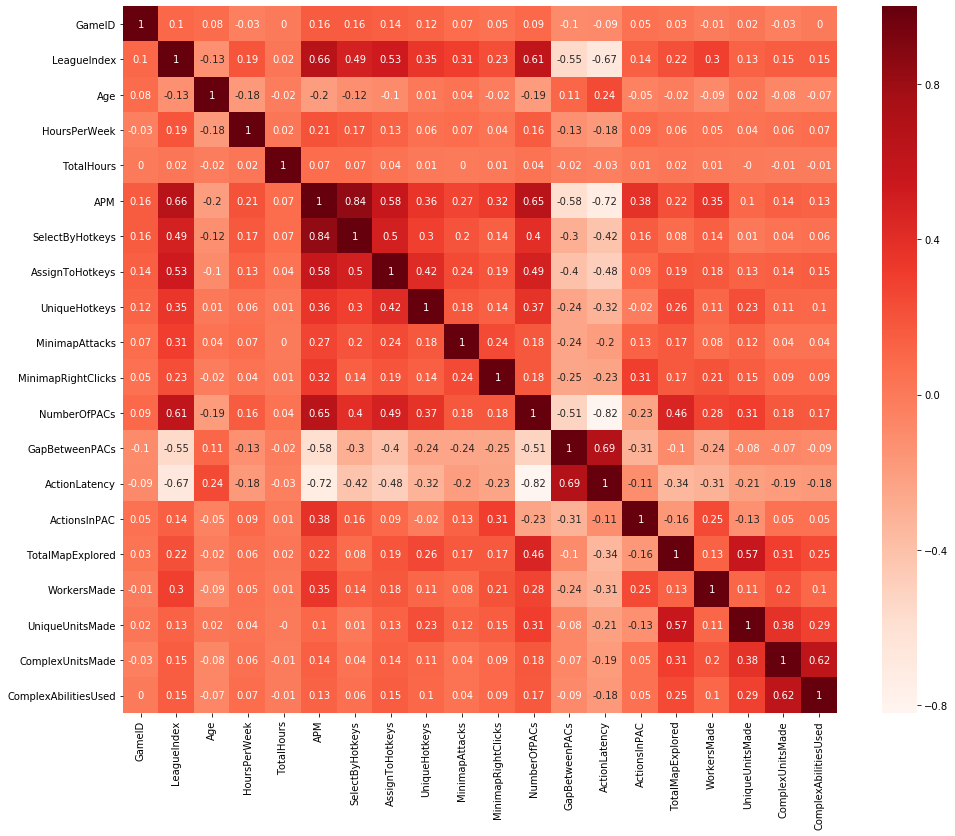

In [8]:
# Let's see if we find interessting patterns in a heatmap visualizing the correlation matrix
plt.figure(figsize=(16,13))
cor = df.corr().round(2)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
# Get the variables highly correlated with the response variable
cor_response = abs(cor["APM"])
relevant_features = cor_response[cor_response>0.5].drop("APM")
relevant_features

LeagueIndex        0.66
SelectByHotkeys    0.84
AssignToHotkeys    0.58
NumberOfPACs       0.65
GapBetweenPACs     0.58
ActionLatency      0.72
Name: APM, dtype: float64

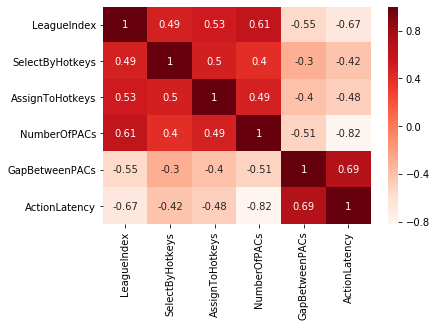

In [10]:
# Visualize the correlation between the relevant features
corr_pred = df[relevant_features.index].corr().round(2)
sns.heatmap(corr_pred, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Backward Selection

In the correlation matrix above we can see that many of the promising features seem to be correlated. Thus we will use backward selection to weed out the features where our null-hypothesis

$$H_0: \omega_i = 0$$

cannot be rejected, because of a p-value > 5%. Hereby $\omega_i$ is the slope estimate of the OLS linear regression. 

In [11]:
import statsmodels.api as sm
# Perform backward selection and see which variables will remain with p-value < 5%

y = df["APM"]
X = df.drop("APM", axis=1)
backward_selection_cols = list(X.columns)
while len(backward_selection_cols) > 0:
    X_1 = sm.add_constant(X[backward_selection_cols].values)
    model = sm.OLS(y,X_1).fit()
    
    p_values = pd.Series(model.pvalues.values[1:], index = backward_selection_cols)      
    pmax = np.max(p_values)
    feature_with_p_max = p_values.idxmax()
    if(pmax>0.05):
        backward_selection_cols.remove(feature_with_p_max)
    else:
        break
        
print(backward_selection_cols)    

['Age', 'SelectByHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'ActionLatency', 'ActionsInPAC', 'WorkersMade', 'UniqueUnitsMade', 'ComplexAbilitiesUsed']


Since the features are on different scales, we standardize them. 

By doing so, the scatter plots make much more sense.

In [12]:
from sklearn.preprocessing import scale
df_scaled = df.drop("APM", axis=1)
df_scaled = pd.DataFrame(data=scale(df_scaled), columns=df.columns.drop("APM"))
df_scaled["APM"] = df["APM"]

In [13]:
# Split the data into train and test set
train, test = train_test_split(df_scaled, train_size=0.7)

predictors = backward_selection_cols

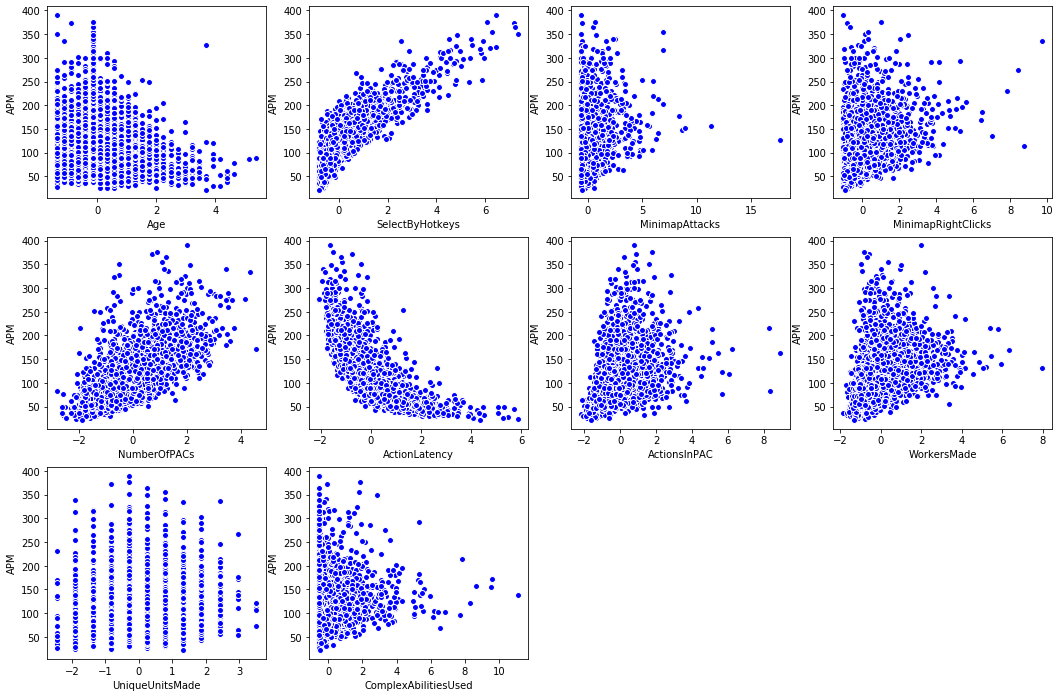

In [14]:
# Plot the distributions of the relevant variables vs the response variable

fig = plt.figure(figsize=(18,12))
for i,col in enumerate(predictors):
    ax = plt.subplot(np.ceil(len(predictors)/4), 4, i+1)
    ax.set_xlabel(col)
    ax.set_ylabel("APM")
    plt.plot(df_scaled[col], df_scaled["APM"], 'bo', mec='w')
#sns.pairplot(df_scaled, x_vars=predictors, y_vars=["APM"])
plt.show()

Judging from the pairplots of the response variable vs scaled features, it seems that 

*  SelectByHotkeys and NumberOfPACs are good choices for a linear fit
*  ActionLatency might be a good choice for a polynomial fit

In [15]:
errors = {}
coef = {}
intercept = {}

for predictor in predictors:
    fit_lin = LinearRegression().fit(train[[predictor]], train["APM"])
    pred = fit_lin.predict(test[[predictor]])
    errors[predictor] = np.square(test["APM"] - pred).sum() / len(test["APM"])
    coef[predictor] = fit_lin.coef_[0]
    intercept[predictor] = fit_lin.intercept_
    errors = pd.Series(errors, name="RMSE").sort_values().round(3)
print("Mean Squared Errors (MSE)")
print(errors)

Mean Squared Errors (MSE)
SelectByHotkeys          841.194
ActionLatency           1358.851
NumberOfPACs            1640.589
ActionsInPAC            2491.768
WorkersMade             2552.686
MinimapRightClicks      2617.139
MinimapAttacks          2724.597
Age                     2770.946
ComplexAbilitiesUsed    2848.422
UniqueUnitsMade         2883.504
Name: RMSE, dtype: float64


As expected by the pairplots SelectByHotkeys has the lowest MSE by far. Let's see the scatterplots and fitted models.

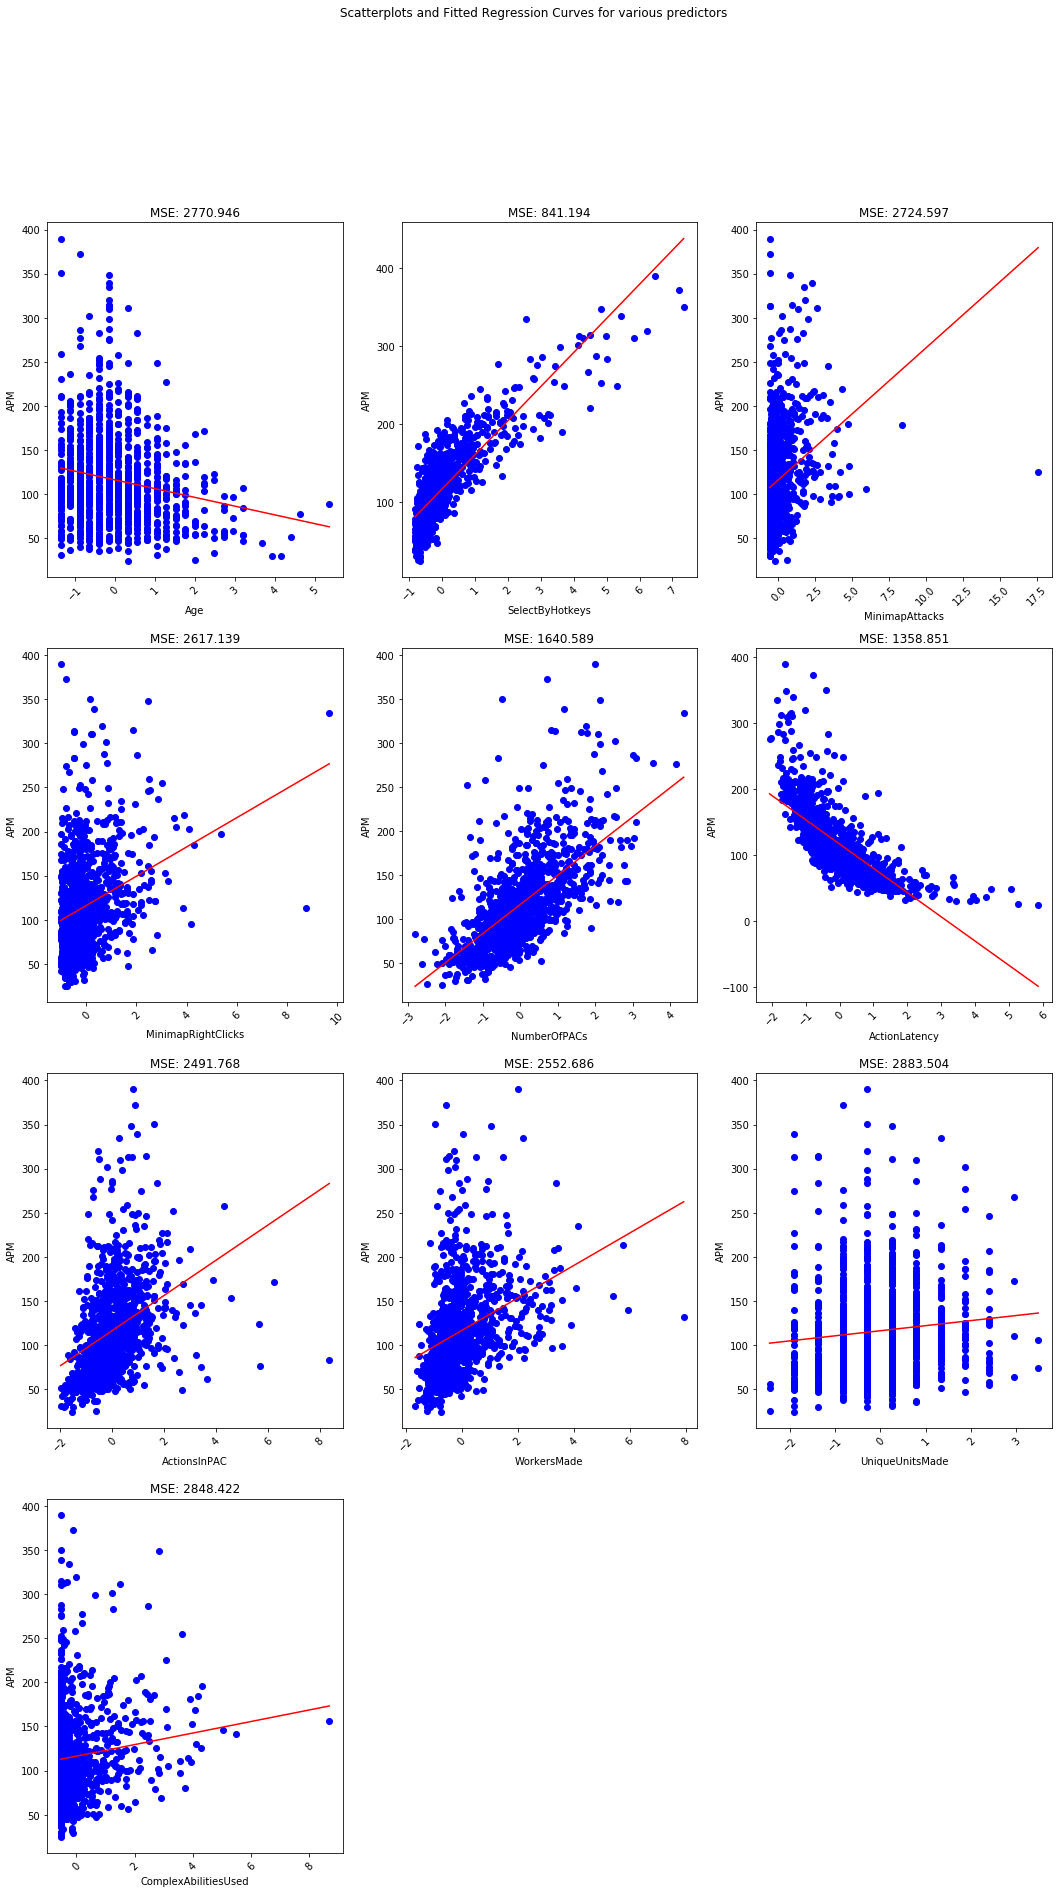

In [16]:
rows = np.ceil(len(predictors) / 3)
fig = plt.figure(figsize=(18,30))
fig.suptitle("Scatterplots and Fitted Regression Curves for various predictors")
for i, predictor in enumerate(predictors):
    ax = fig.add_subplot(rows, 3, i+1)
    ax.set_xlabel(predictor)
    ax.set_ylabel("APM")
    ax.set_title("MSE: {}".format(errors[predictor]))
    x = np.linspace(min(test[predictor]), max(test[predictor]), 100)
    ax.plot(test[predictor], test["APM"], 'bo')
    ax.plot(x, coef[predictor] * x + intercept[predictor], 'r-')
    ax.tick_params(axis="x", labelrotation=45)

### Polynomial Regression

Now let's see which features will perform best in a polynomial regression.

In [17]:
#df = df.dropna()
y = df["APM"]
df_scaled = df_scaled[predictors]
#df = df.drop(["APM", "GameID", "Age", "LeagueIndex", "TotalHours", "HoursPerWeek"], axis=1)
train_X, test_X, train_y, test_y = train_test_split(df_scaled, y, train_size=0.7, random_state=42)

In [18]:
coefficients = {}
intercepts = {}
errors = {}

poly_predictors = ["GapBetweenPACs", "ActionLatency", "SelectByHotkeys"]
poly_predictors = predictors
for predictor in poly_predictors:
    pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('lr',LinearRegression())])
    fit = pipeline.fit(train_X, train_y)

    pred = fit.predict(test_X)
    lr = fit.named_steps['lr']
    
    coefficients[predictor] = lr.coef_
    intercepts[predictor] = lr.intercept_
    errors[predictor] = -np.mean(cross_val_score(fit, test_X[[predictor]], test_y,
                             scoring="neg_mean_squared_error", cv=10))

errors = pd.Series(errors, name="MSE").sort_values()
print("Root Mean Squared Errors (MSE)")
print(errors)

Root Mean Squared Errors (MSE)
SelectByHotkeys          662.173343
ActionLatency           1188.696116
NumberOfPACs            1732.173275
ActionsInPAC            2366.765765
MinimapRightClicks      2610.485970
WorkersMade             2620.821180
MinimapAttacks          2735.809795
Age                     2782.721232
ComplexAbilitiesUsed    2876.592330
UniqueUnitsMade         2892.925435
Name: MSE, dtype: float64


In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


errors = {}
best_degree = {}

for predictor in predictors:
    poly_params = {'polynomialfeatures__degree': range(1,10)}
    poly_grid = GridSearchCV(PolynomialRegression(), poly_params,
                         cv=3, n_jobs=-1, verbose=True, scoring="neg_mean_squared_error")

    fit = poly_grid.fit(train_X[[predictor]], train_y)
    
    errors[predictor] = fit.best_score_
    best_degree[predictor] = fit.best_params_["polynomialfeatures__degree"]



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.0s remaining:    0.1s


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  27 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


In [20]:
best_poly = pd.DataFrame(errors.values(), index=list(errors.keys()), columns=["MSE"])
best_poly["Degree"] = best_degree.values()
best_poly

,MSE,Degree
Age,-2479.739786,3
SelectByHotkeys,-664.185206,5
MinimapAttacks,-2397.851072,2
MinimapRightClicks,-2316.911586,3
NumberOfPACs,-1475.611487,2
ActionLatency,-927.193729,5
ActionsInPAC,-2119.458498,4
WorkersMade,-2150.923201,4
UniqueUnitsMade,-2585.571044,1
ComplexAbilitiesUsed,-2542.554709,5


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

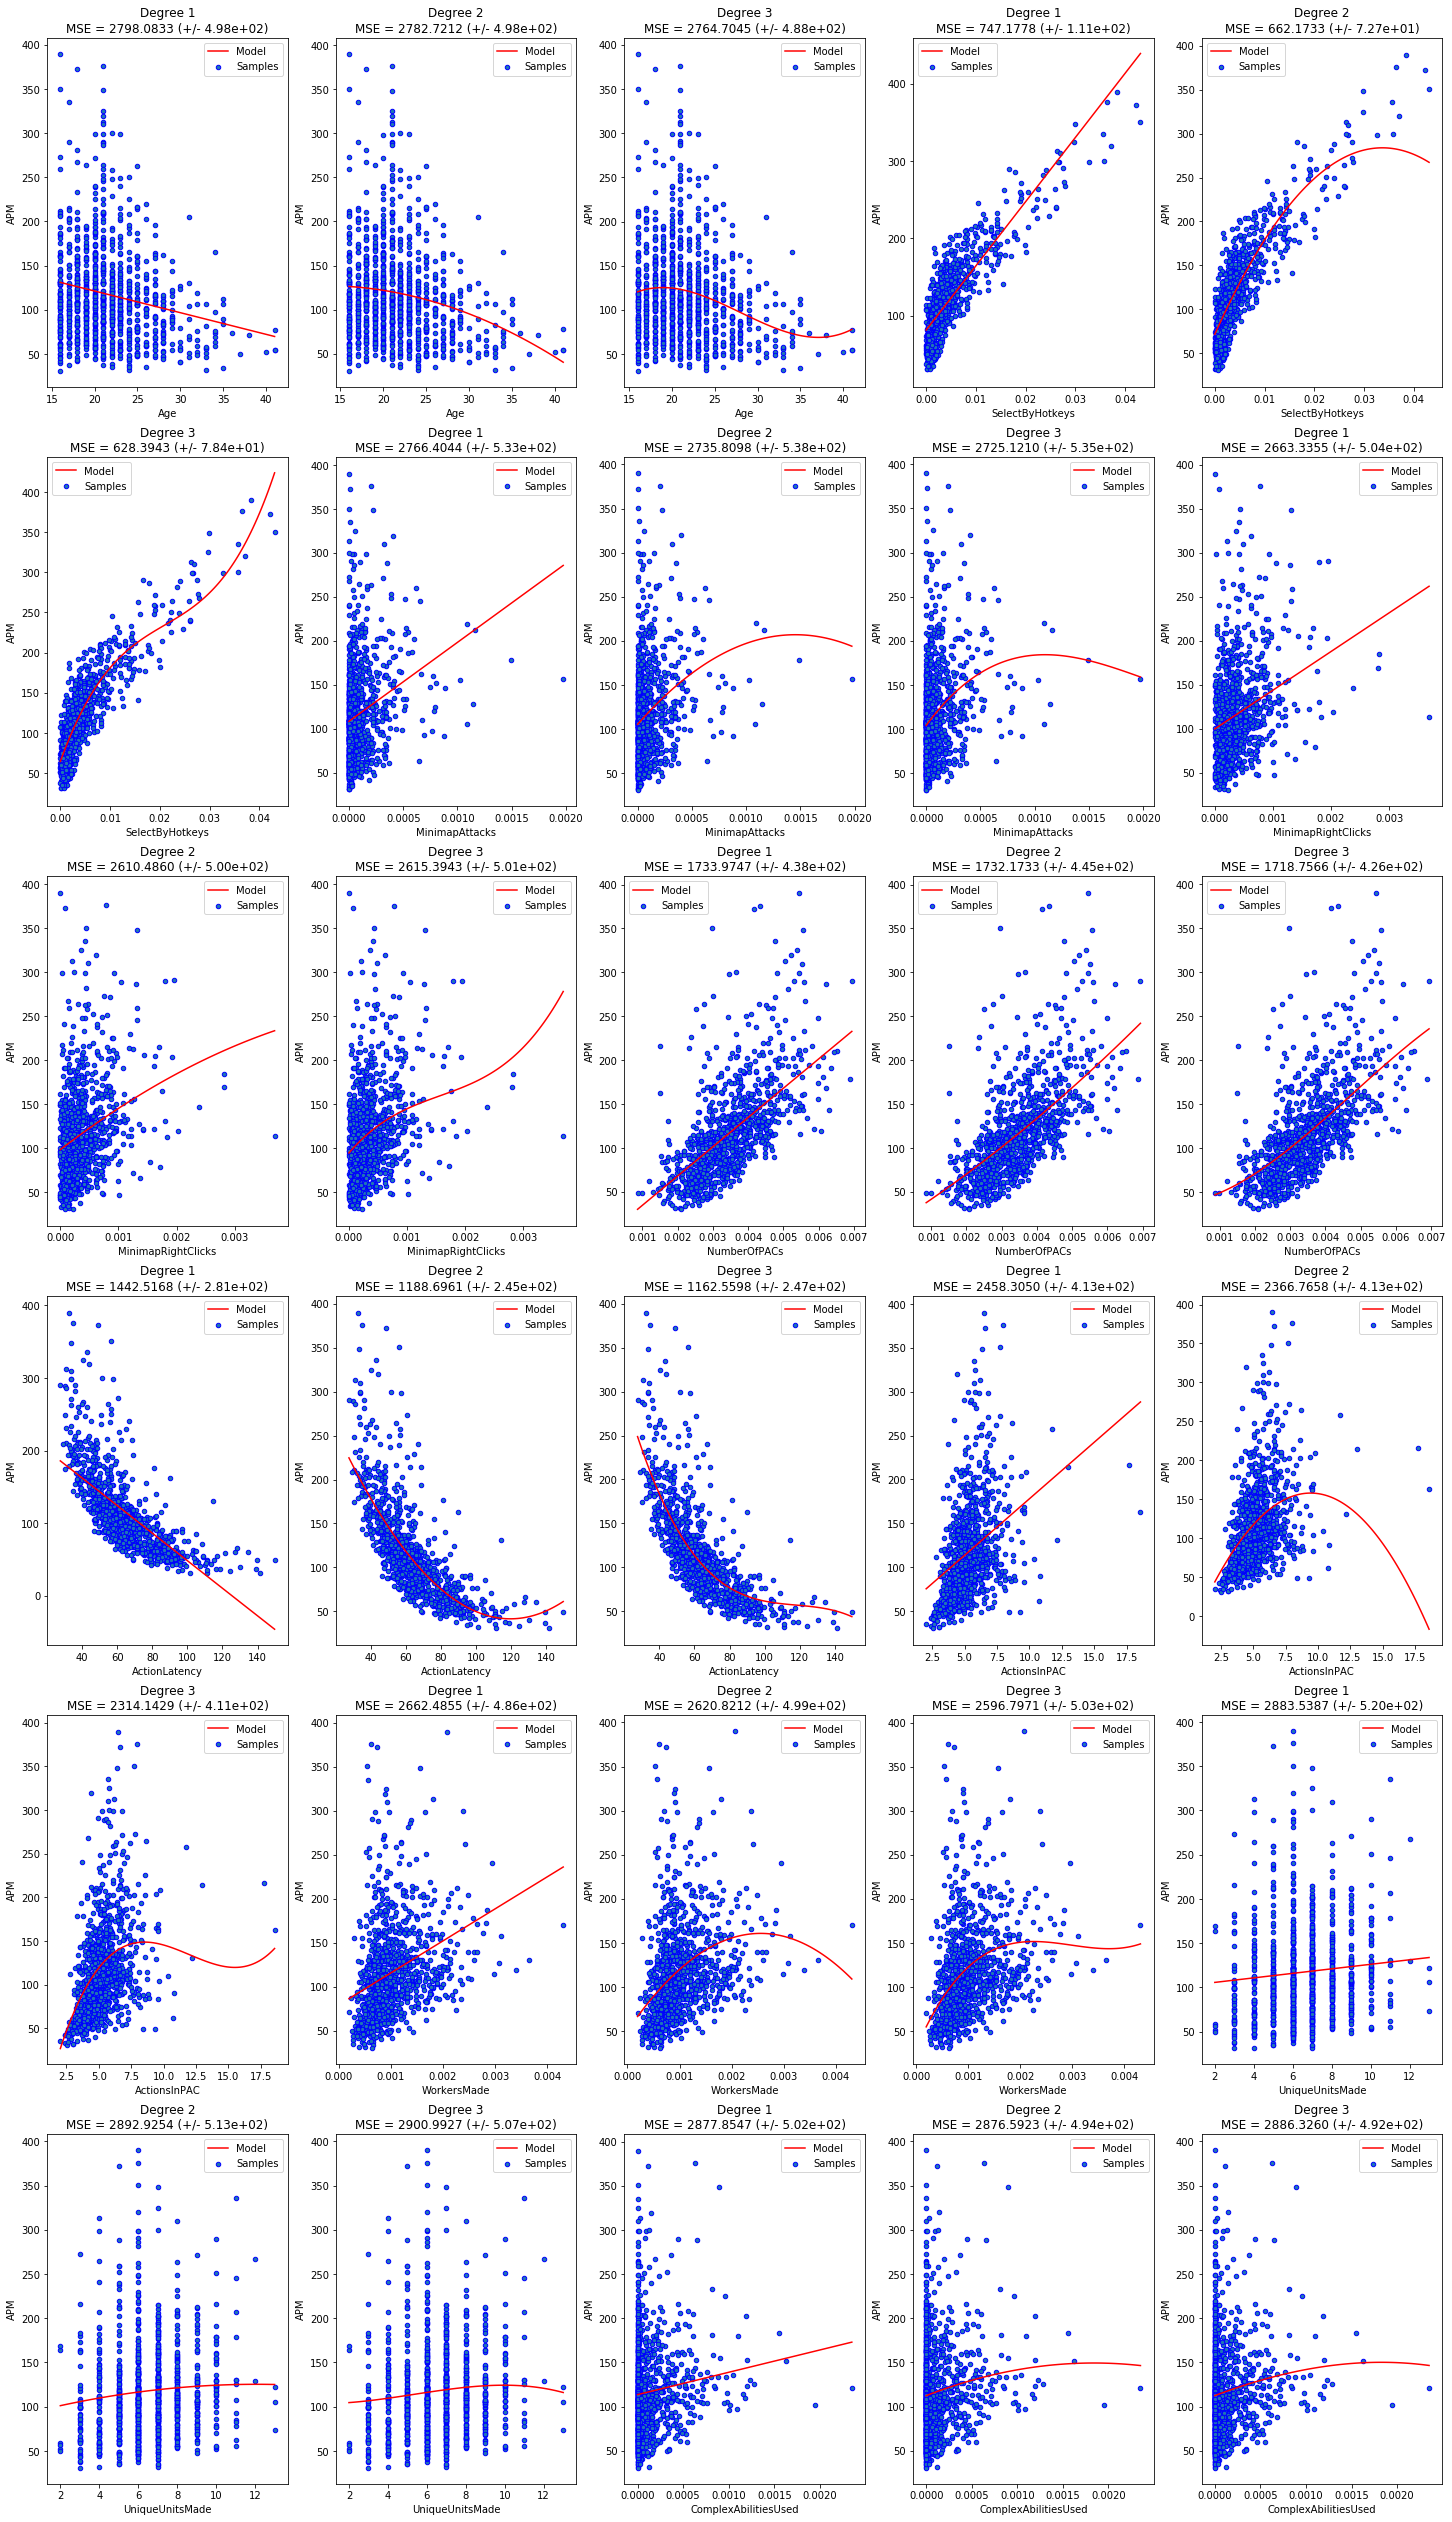

In [22]:
def plot_regression(predictors, degrees, height=32):
    plt.figure(figsize=(25, height))
    j = 0
    for predictor in predictors:
        for i in range(len(degrees)):
            j += 1
            ax = plt.subplot(np.ceil(len(degrees)*len(predictors)/5), 5, j)

            polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
            linear_regression = LinearRegression()
            pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
            pipeline.fit(train_X[[predictor]], train_y)

            # Evaluate the models using crossvalidation
            scores = cross_val_score(pipeline, test_X[[predictor]], test_y,
                                 scoring="neg_mean_squared_error", cv=10)

            xs = np.linspace(np.min(test_X[predictor]), np.max(test_X[predictor]), 100)
            plt.plot(xs, pipeline.predict(xs.reshape(-1,1)), 'r-', label="Model")
            plt.scatter(test_X[[predictor]], test_y, edgecolor='b', s=20, label="Samples")
            ax.set_xlabel(predictor)
            ax.set_ylabel("APM")        
            plt.legend(loc="best")
            plt.title("Degree {}\nMSE = {:.4f} (+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    plt.show()

train_X, test_X, train_y, test_y = train_test_split(df, y, random_state=42, train_size=0.7)   
plot_regression(predictors, [1, 2, 3], 45)

Mean Squared Errors (MSE)


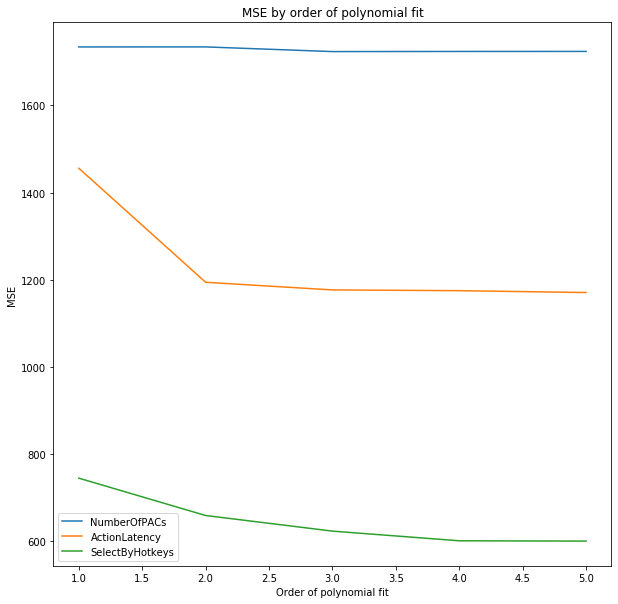

In [36]:
coefficients = {}
intercepts = {}
errors = {}

xs = np.arange(1,10,1)
poly_predictors = ["NumberOfPACs", "ActionLatency", "SelectByHotkeys"]
#poly_predictors = predictors
for predictor in poly_predictors:
    coefficients[predictor] = {}
    intercepts[predictor] = {}
    errors[predictor] = {}
    for i in range(5):
        linear_regression = LinearRegression()
        polynomial_features = PolynomialFeatures(degree=i+1,
                                                 include_bias=False)
        
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        
        pipeline.fit(train_X[[predictor]], train_y)
        
        # Evaluate the models using crossvalidation
        errors[predictor][i+1] = -np.mean(cross_val_score(pipeline, test_X[[predictor]], test_y,
                                 scoring="neg_mean_squared_error", cv=3))
        

errors = pd.DataFrame(errors)
print("Mean Squared Errors (MSE)")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(title="MSE by order of polynomial fit")
plt.plot(errors)
ax.set_xlabel("Order of polynomial fit")
ax.set_ylabel("MSE")
plt.legend(labels=errors.columns )
plt.show()

## Regularization

In [37]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

### The Lasso

In [89]:
lasso_alphas = 10**np.linspace(1, -7, 100)

lasso_cv = LassoCV(alphas=lasso_alphas, cv=10, random_state=42)
lasso_cv.fit(train_X[predictors], train_y)

cv_score = cross_val_score(lasso_cv, test_X[predictors], test_y, cv=10, 
                scoring='neg_mean_squared_error')

abs(np.mean(cv_score))

array([ -43.25010434, -111.24119986,  -36.85683491,  -55.81781154,
        -49.62598842,  -51.97336554,  -74.74791139,  -95.44451032,
        -39.24221825,  -52.95757172])

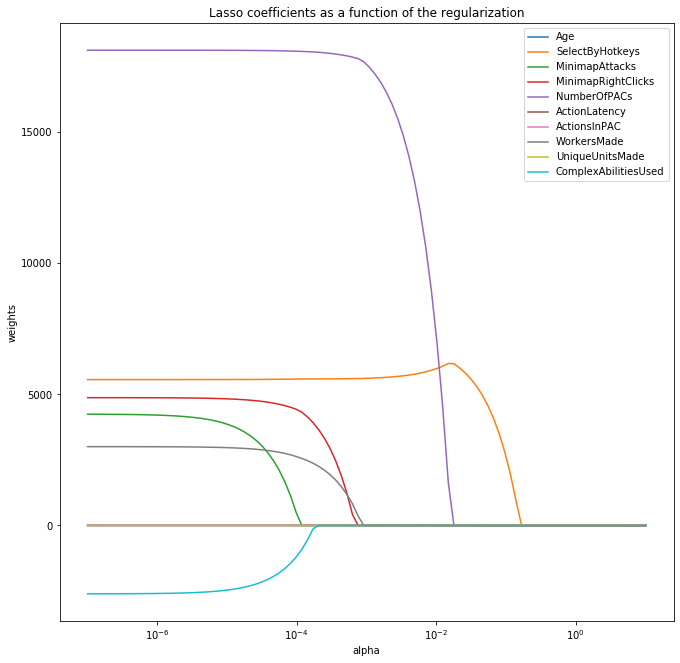

In [94]:
coefs = []
errors = {}
for a in lasso_alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(train_X[predictors], train_y)
    coefs.append(lasso.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(lasso, test_X[predictors], test_y, cv=10,
                               scoring="neg_mean_squared_error"))
# #############################################################################
# Display results

plt.figure(figsize=(11,11))

ax = plt.gca()

ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(labels=train_X[predictors].columns)
plt.show()

Text(0, 0.5, 'mean MSE')

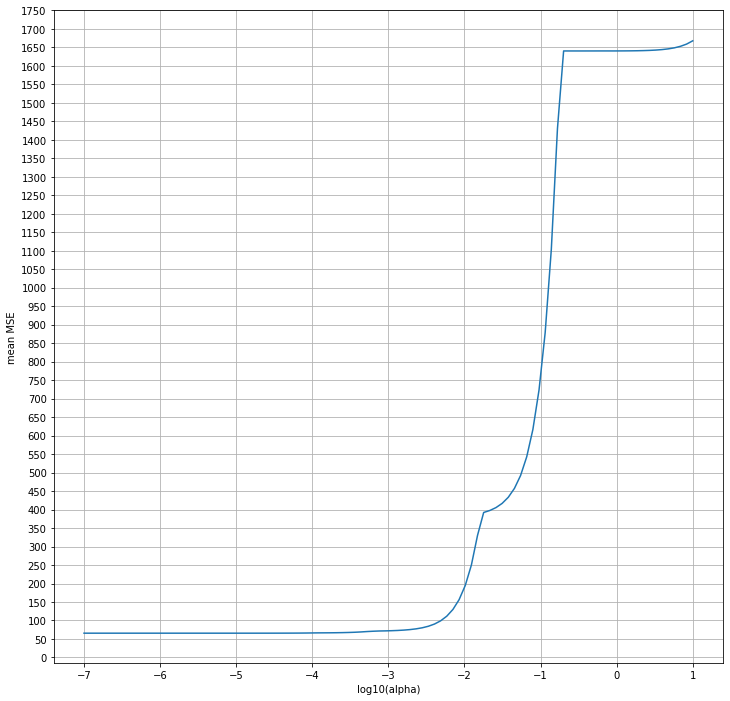

In [92]:
fig = plt.figure(figsize=(12,12))
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.yticks(np.arange(0,1800,50))
plt.grid(True)
plt.xlabel("log10(alpha)")
plt.ylabel("mean MSE")

### Ridge Regression

In [93]:
ridge_alphas = 10**np.linspace(-7, 2, 100)

ridge_cv = RidgeCV(alphas=ridge_alphas, cv=10)
ridge_cv.fit(train_X[predictors], train_y)

cv_ridge_score = cross_val_score(Ridge(ridge_cv.alpha_), test_X[predictors], test_y, cv=10,
                                scoring="neg_mean_squared_error")
abs(np.mean(cv_ridge_score))

61.08405046796963

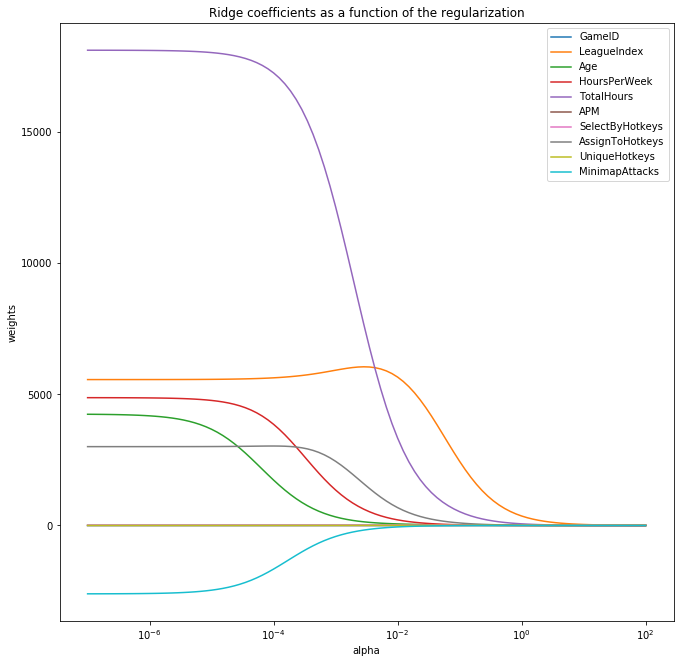

In [83]:

coefs = []
errors = {}
for a in ridge_alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X[predictors],train_y)
    coefs.append(ridge.coef_)
    errors[np.log10(a)] = -np.mean(cross_val_score(ridge, test_X[predictors], test_y, cv=10,
                               scoring="neg_mean_squared_error"))


plt.figure(figsize=(11,11))
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(labels=train_X.columns)
plt.show()


Text(0, 0.5, 'mean MSE')

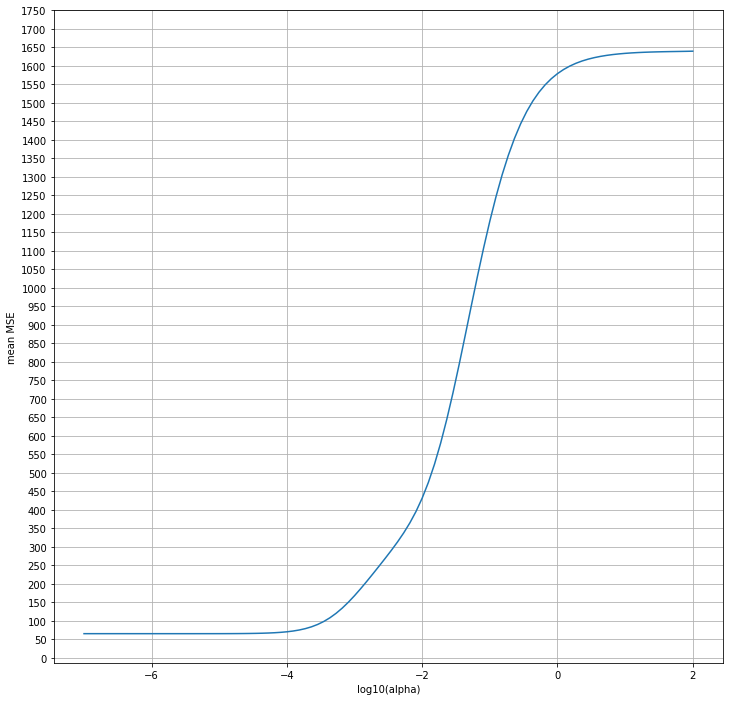

In [84]:
fig = plt.figure(figsize=(12,12))
ax = plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("log10(alpha)")
plt.grid(True)
plt.yticks(np.arange(0,1800,50))
plt.ylabel("mean MSE")